In [35]:
# loading the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np
print("done")

done


In [36]:
#laod the datasets
data = pd.read_csv("./data/transactionDataset (Device Velocity).csv")
print("done praise")

done praise


In [37]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Device,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,1.00,1


In [38]:
# indicating the features and target
features = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8"]
target = ["Class"]
X = data[features]
y = data[target]

print("done")

done


In [39]:
if data.isnull().values.any():
    print("there are null values")

else:
    print("there are no null values")

there are no null values


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

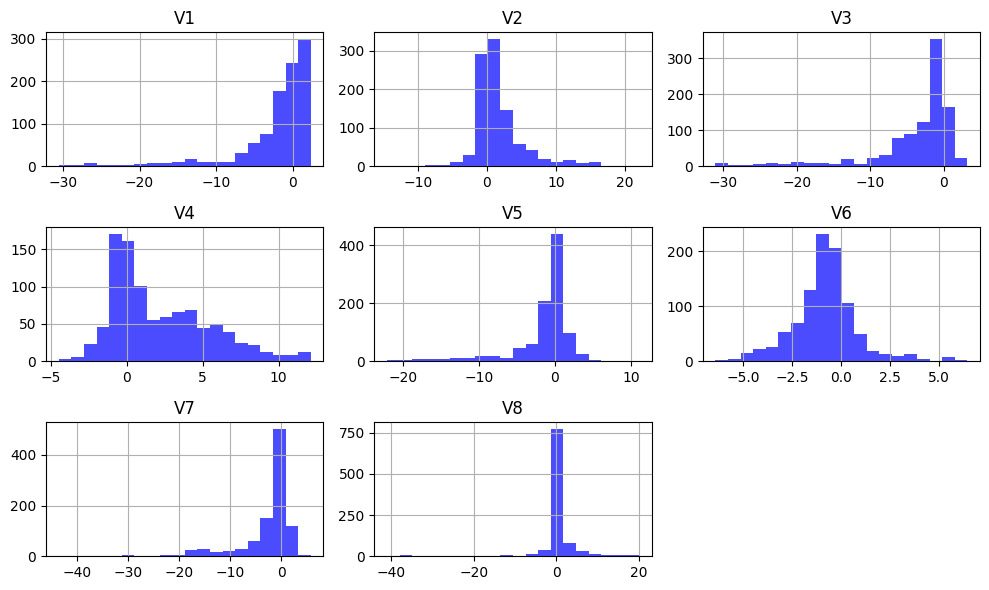

In [41]:
data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']].hist(figsize=(10, 6), bins=20, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
# model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test)

In [43]:
# model 2: Random forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_score = RFC.score(X_test, y_test)

c:\Users\USER\anaconda3\envs\exhibit-2\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:
# model 3: Random forest regressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR_score = RFR.score(X_test, y_test)

c:\Users\USER\anaconda3\envs\exhibit-2\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [45]:
# print the accuracy score
print("LinearRegression: ",linear_score)
print("RandomForestClassifier: ",RFC_score)
print("RandomForestRegressor: ",RFR_score)


LinearRegression:  0.2984339568049704
RandomForestClassifier:  0.7918781725888325
RandomForestRegressor:  0.3656787364130434


In [46]:
# saving the model 
model_filename = "detection model"
with open (model_filename, "wb") as model_file:
    joblib.dump(RFC, model_file)

    print (f"model has been saved to {model_filename}")

model has been saved to detection model


In [47]:
def predict_transaction_class(model):
    # Ask user for input for each feature
    user_input = {}
    for i in range(1, 9):
        user_input[f"V{i}"] = float(input(f"Enter value for V{i}: "))

    # Create a DataFrame from the user input
    user_dataframe = pd.DataFrame([user_input])

    # Use the model to predict the outcome
    prediction = model.predict(user_dataframe)

    return prediction

# Use the function to make predictions
model = RFC
predicted_class = predict_transaction_class(model)

print("Predicted class:", predicted_class)


Predicted class: [1]
